## Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Read the Datasets

In [3]:
book = pd.read_csv(r"D:\Data science\DataSets\book.csv")
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
#######Checking duplicates######
duplicate = book.duplicated()
duplicate
sum(duplicate)
# Removing Duplicates
book1 = book.drop_duplicates()

## Outlier Treatment 

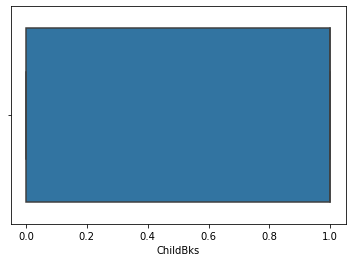

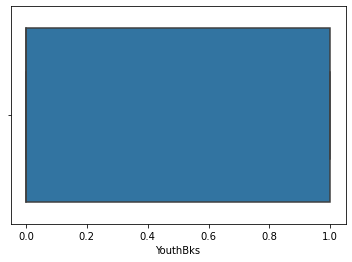

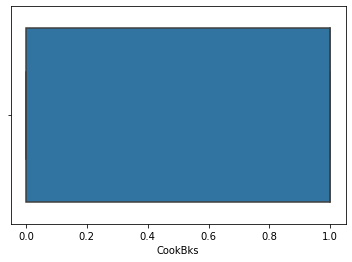

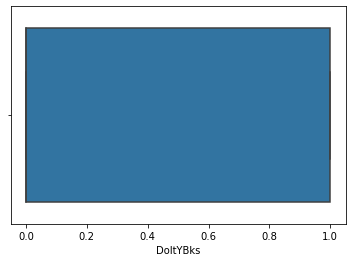

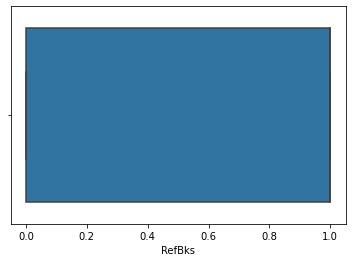

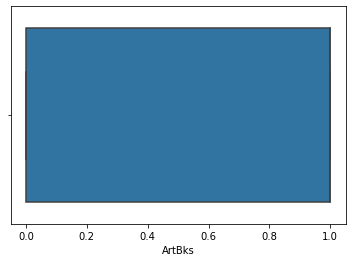

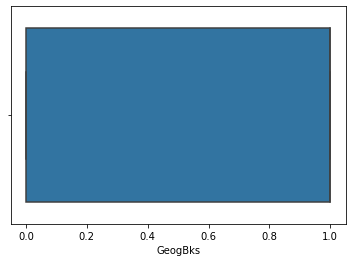

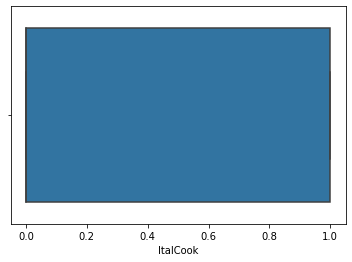

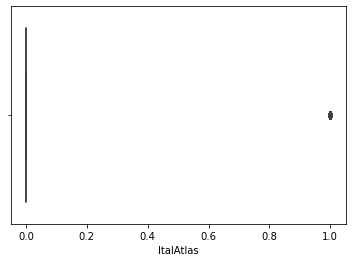

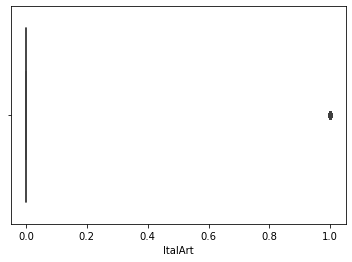

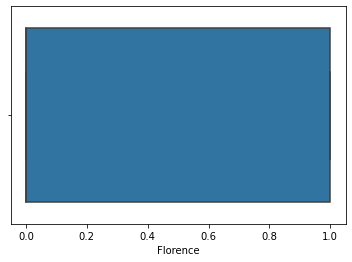

In [5]:
for i in book1:
    #print(i)
    if book1[i].dtypes==np.int64 or book1[i].dtypes==np.float64:
        plt.figure()
        sns.boxplot(book1[i])

In [6]:
#Removing outliers by winsorization
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'])
df_t = winsor.fit_transform(book1[['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence']])
#There are no outliers in the data

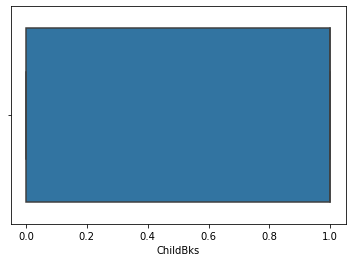

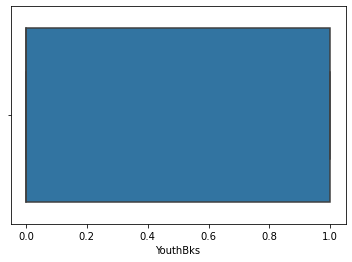

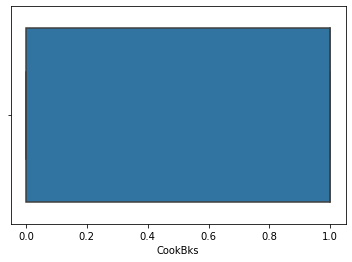

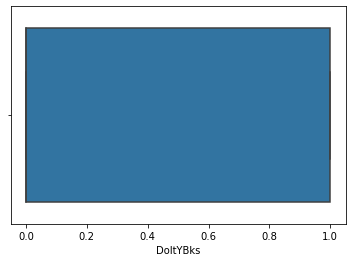

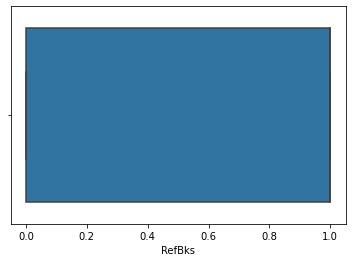

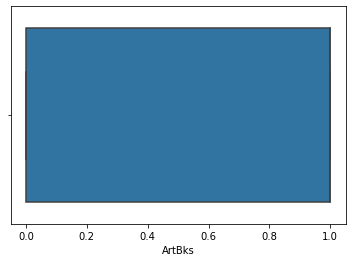

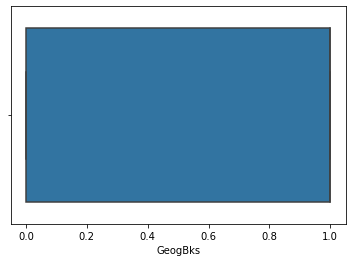

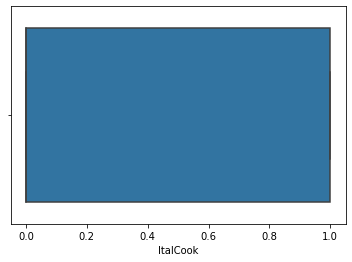

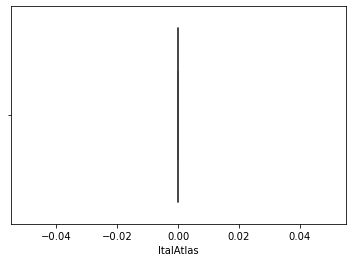

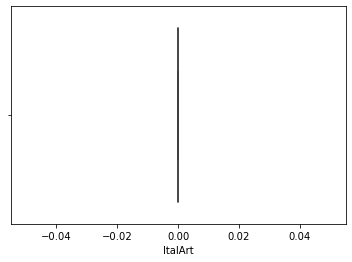

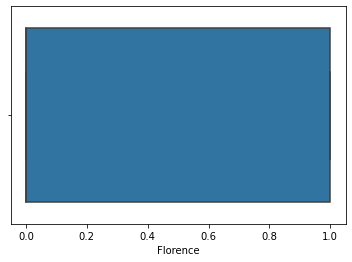

In [7]:
for i in df_t:
    #print(i)
    if df_t[i].dtypes==np.int64 or df_t[i].dtypes==np.float64:
        plt.figure()
        sns.boxplot(df_t[i])

##### There are no outliers in the data

In [8]:
df_t.info()
df_t = df_t.drop(['ItalAtlas', "ItalArt"], axis=1)
# in this variables ItalAtlas and ItalArtall the values are zero 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 1995
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ChildBks   320 non-null    float64
 1   YouthBks   320 non-null    float64
 2   CookBks    320 non-null    float64
 3   DoItYBks   320 non-null    float64
 4   RefBks     320 non-null    float64
 5   ArtBks     320 non-null    float64
 6   GeogBks    320 non-null    float64
 7   ItalCook   320 non-null    float64
 8   ItalAtlas  320 non-null    float64
 9   ItalArt    320 non-null    float64
 10  Florence   320 non-null    float64
dtypes: float64(11)
memory usage: 30.0 KB


In [9]:
#################### Missing Values - Imputation ###########################
#Check for count of NA's in each column
df_t.isna().sum()

ChildBks    0
YouthBks    0
CookBks     0
DoItYBks    0
RefBks      0
ArtBks      0
GeogBks     0
ItalCook    0
Florence    0
dtype: int64

###### There are no NA values in the data

In [10]:
############Checking for the normality############
a=df_t.describe()
a

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,Florence
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.612500,0.450000,0.681250,0.490625,0.506250,0.556250,0.521875,0.334375,0.318750
std,0.487942,0.498273,0.466722,0.500695,0.500744,0.497604,0.500304,0.472510,0.466722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Data is normal

In [11]:
# Exploratory Data Analysis
# Measures of Central Tendency / First moment business decision
df_t.mode()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,Florence
0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


(array([[124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 196.],
        [176.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 144.],
        [102.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 218.],
        [163.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 157.],
        [158.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 162.],
        [142.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 178.],
        [153.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 167.],
        [213.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 107.],
        [218.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 102.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 9 BarContainer objects>)

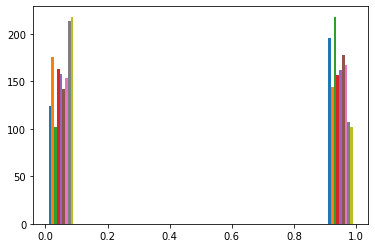

In [12]:
# Data Visualization
plt.hist(df_t)
#Data follows normal as we can see bellshaped curve

In [13]:
#Checking correlation
cor=df_t.corr()
cor

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,Florence
ChildBks,1.000000,0.100570,0.089130,0.062071,0.125413,0.102965,0.099038,0.169447,0.020992
YouthBks,0.100570,1.000000,0.066051,-0.008167,0.064076,0.011379,-0.001886,0.077891,-0.093011
CookBks,0.089130,0.066051,1.000000,0.040831,0.035378,0.023453,0.029955,0.484813,-0.007016
DoItYBks,0.062071,-0.008167,0.040831,1.000000,0.006486,0.071325,-0.036721,0.033167,-0.027416
RefBks,0.125413,0.064076,0.035378,0.006486,1.000000,-0.064320,0.005709,0.024262,-0.048791
ArtBks,0.102965,0.011379,0.023453,0.071325,-0.064320,1.000000,0.039114,0.033081,0.125025
GeogBks,0.099038,-0.001886,0.029955,-0.036721,0.005709,0.039114,1.000000,0.028635,0.117721
ItalCook,0.169447,0.077891,0.484813,0.033167,0.024262,0.033081,0.028635,1.000000,-0.058369
Florence,0.020992,-0.093011,-0.007016,-0.027416,-0.048791,0.125025,0.117721,-0.058369,1.000000


In [14]:
# Implementing Apriori algorithm from mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df_t, min_support = 0.0075, max_len = 4, use_colnames = True)


C:\Users\SHREE\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)


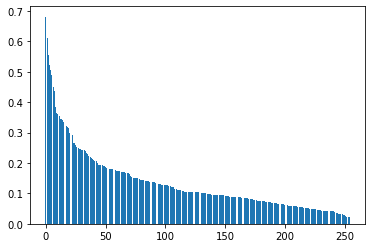

In [16]:
#Plotting the most frequent data
plt.bar(x = list(range(0, 255)), height = frequent_itemsets.support[0:255]);


In [17]:
# Association Rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1339,"(GeogBks, CookBks)","(ItalCook, Florence)",0.36250,0.09375,0.068750,0.189655,2.022989,0.034766,1.118351
1342,"(ItalCook, Florence)","(GeogBks, CookBks)",0.09375,0.36250,0.068750,0.733333,2.022989,0.034766,2.390625
274,"(ChildBks, CookBks)","(ItalCook, RefBks)",0.43750,0.17500,0.143750,0.328571,1.877551,0.067187,1.228723
275,"(ItalCook, RefBks)","(ChildBks, CookBks)",0.17500,0.43750,0.143750,0.821429,1.877551,0.067187,3.150000
1236,"(ItalCook, Florence)","(ChildBks, CookBks)",0.09375,0.43750,0.075000,0.800000,1.828571,0.033984,2.812500
1235,"(ChildBks, CookBks)","(ItalCook, Florence)",0.43750,0.09375,0.075000,0.171429,1.828571,0.033984,1.093750
1712,"(ItalCook, Florence)","(GeogBks, ArtBks)",0.09375,0.30000,0.050000,0.533333,1.777778,0.021875,1.500000
1709,"(GeogBks, ArtBks)","(ItalCook, Florence)",0.30000,0.09375,0.050000,0.166667,1.777778,0.021875,1.087500
307,"(ChildBks, CookBks)","(GeogBks, ItalCook)",0.43750,0.18125,0.140625,0.321429,1.773399,0.061328,1.206579
310,"(GeogBks, ItalCook)","(ChildBks, CookBks)",0.18125,0.43750,0.140625,0.775862,1.773399,0.061328,2.509615


In [18]:
################################# Extra part ###################################
# Handling Profusion of Rules (Duplication elimination)

def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]
rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1324,"(RefBks, Florence)",(YouthBks),0.150000,0.450000,0.068750,0.458333,1.018519,0.001250,1.015385
1822,"(RefBks, YouthBks, Florence)",(DoItYBks),0.068750,0.490625,0.037500,0.545455,1.111754,0.003770,1.120625
568,"(GeogBks, DoItYBks)",(YouthBks),0.246875,0.450000,0.112500,0.455696,1.012658,0.001406,1.010465
54,(ChildBks),(ItalCook),0.612500,0.334375,0.243750,0.397959,1.190158,0.038945,1.105614
336,"(ChildBks, YouthBks, ArtBks)",(CookBks),0.181250,0.681250,0.137500,0.758621,1.113572,0.014023,1.320536
...,...,...,...,...,...,...,...,...,...
1302,"(GeogBks, RefBks, Florence)",(CookBks),0.093750,0.681250,0.068750,0.733333,1.076453,0.004883,1.195313
1486,"(ChildBks, GeogBks, DoItYBks)",(Florence),0.165625,0.318750,0.059375,0.358491,1.124676,0.006582,1.061949
1024,"(GeogBks, YouthBks, CookBks)",(DoItYBks),0.171875,0.490625,0.087500,0.509091,1.037638,0.003174,1.037616
1596,"(ChildBks, RefBks, Florence)",(DoItYBks),0.106250,0.490625,0.053125,0.500000,1.019108,0.000996,1.018750


In [19]:
# Sorting them with respect to list and getting top 10 rules 
rules10 = rules_no_redudancy.sort_values('lift', ascending = False).head(10)
rules100 = rules_no_redudancy.sort_values('lift', ascending = False)
rules100

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
302,"(ChildBks, GeogBks, CookBks)",(ItalCook),0.240625,0.334375,0.140625,0.584416,1.747785,0.060166,1.601660
534,"(GeogBks, ArtBks, CookBks)",(ItalCook),0.212500,0.334375,0.112500,0.529412,1.583288,0.041445,1.414453
950,"(GeogBks, YouthBks, CookBks)",(ItalCook),0.171875,0.334375,0.087500,0.509091,1.522515,0.030029,1.355903
1014,"(GeogBks, CookBks, DoItYBks)",(ItalCook),0.171875,0.334375,0.087500,0.509091,1.522515,0.030029,1.355903
850,"(GeogBks, RefBks, CookBks)",(ItalCook),0.184375,0.334375,0.093750,0.508475,1.520672,0.032100,1.354203
...,...,...,...,...,...,...,...,...,...
288,"(ChildBks, GeogBks, ArtBks)",(CookBks),0.209375,0.681250,0.143750,0.686567,1.007805,0.001113,1.016964
38,(RefBks),(DoItYBks),0.506250,0.490625,0.250000,0.493827,1.006527,0.001621,1.006326
214,"(ChildBks, DoItYBks)",(GeogBks),0.315625,0.521875,0.165625,0.524752,1.005514,0.000908,1.006055
28,(GeogBks),(RefBks),0.521875,0.506250,0.265625,0.508982,1.005397,0.001426,1.005564
